In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


Descripcion de los datos:

El dataset a utilizar en la elaboracion del proyecto final de la materia de Analisis Estadistico Multivariado proviene de 'https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17'.

Nuestros datos consisten en 100,000 observaciones con 17 features y una columna target.

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object) (Target)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [2]:
datos = pd.read_csv("C:\\Users\\ivanm\\OneDrive\\Documentos\\4toSemestre\\Analisis Estadistico Multivariable\\star_classification.csv")
datos.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<Axes: >

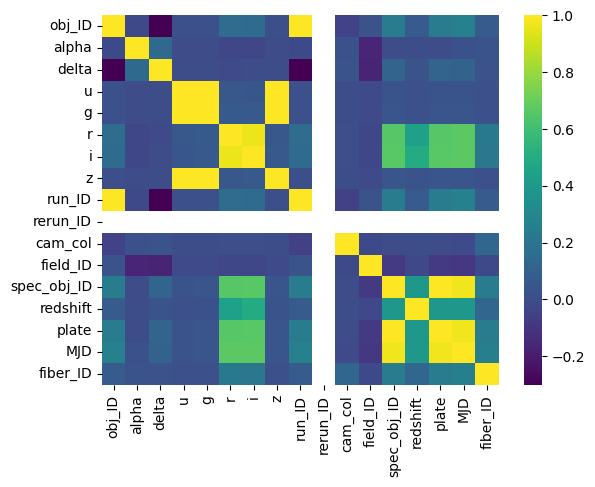

In [3]:
X = datos.drop(columns=['class'], axis=1)
Y = datos['class']

sns.heatmap(X.corr(), annot=False, fmt='.2f', cmap='viridis')

C:\Users\ivanm\AppData\Local\Temp\ipykernel_33764\3255346456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=datos, palette={'STAR': '#6ce5e8', 'GALAXY': '#ff00ab', 'QSO': '#8873ff'})


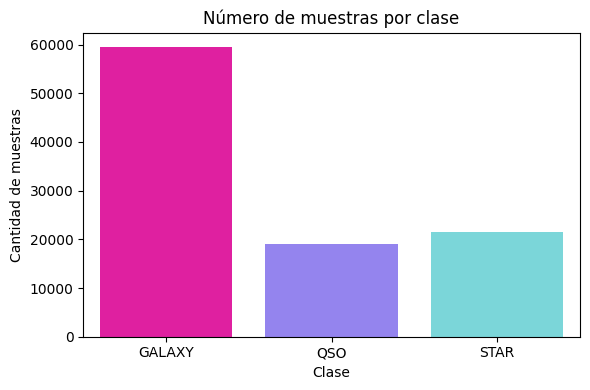

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=datos, palette={'STAR': '#6ce5e8', 'GALAXY': '#ff00ab', 'QSO': '#8873ff'})

plt.title('Número de muestras por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.tight_layout()
plt.show()

Notamos que existe un serio desbalanceo de clases el cual ajustaremos para obtener resultados precisos con nuestros modelos.

C:\Users\ivanm\AppData\Local\Temp\ipykernel_33764\1031061132.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=datos, x=var, hue='class', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)


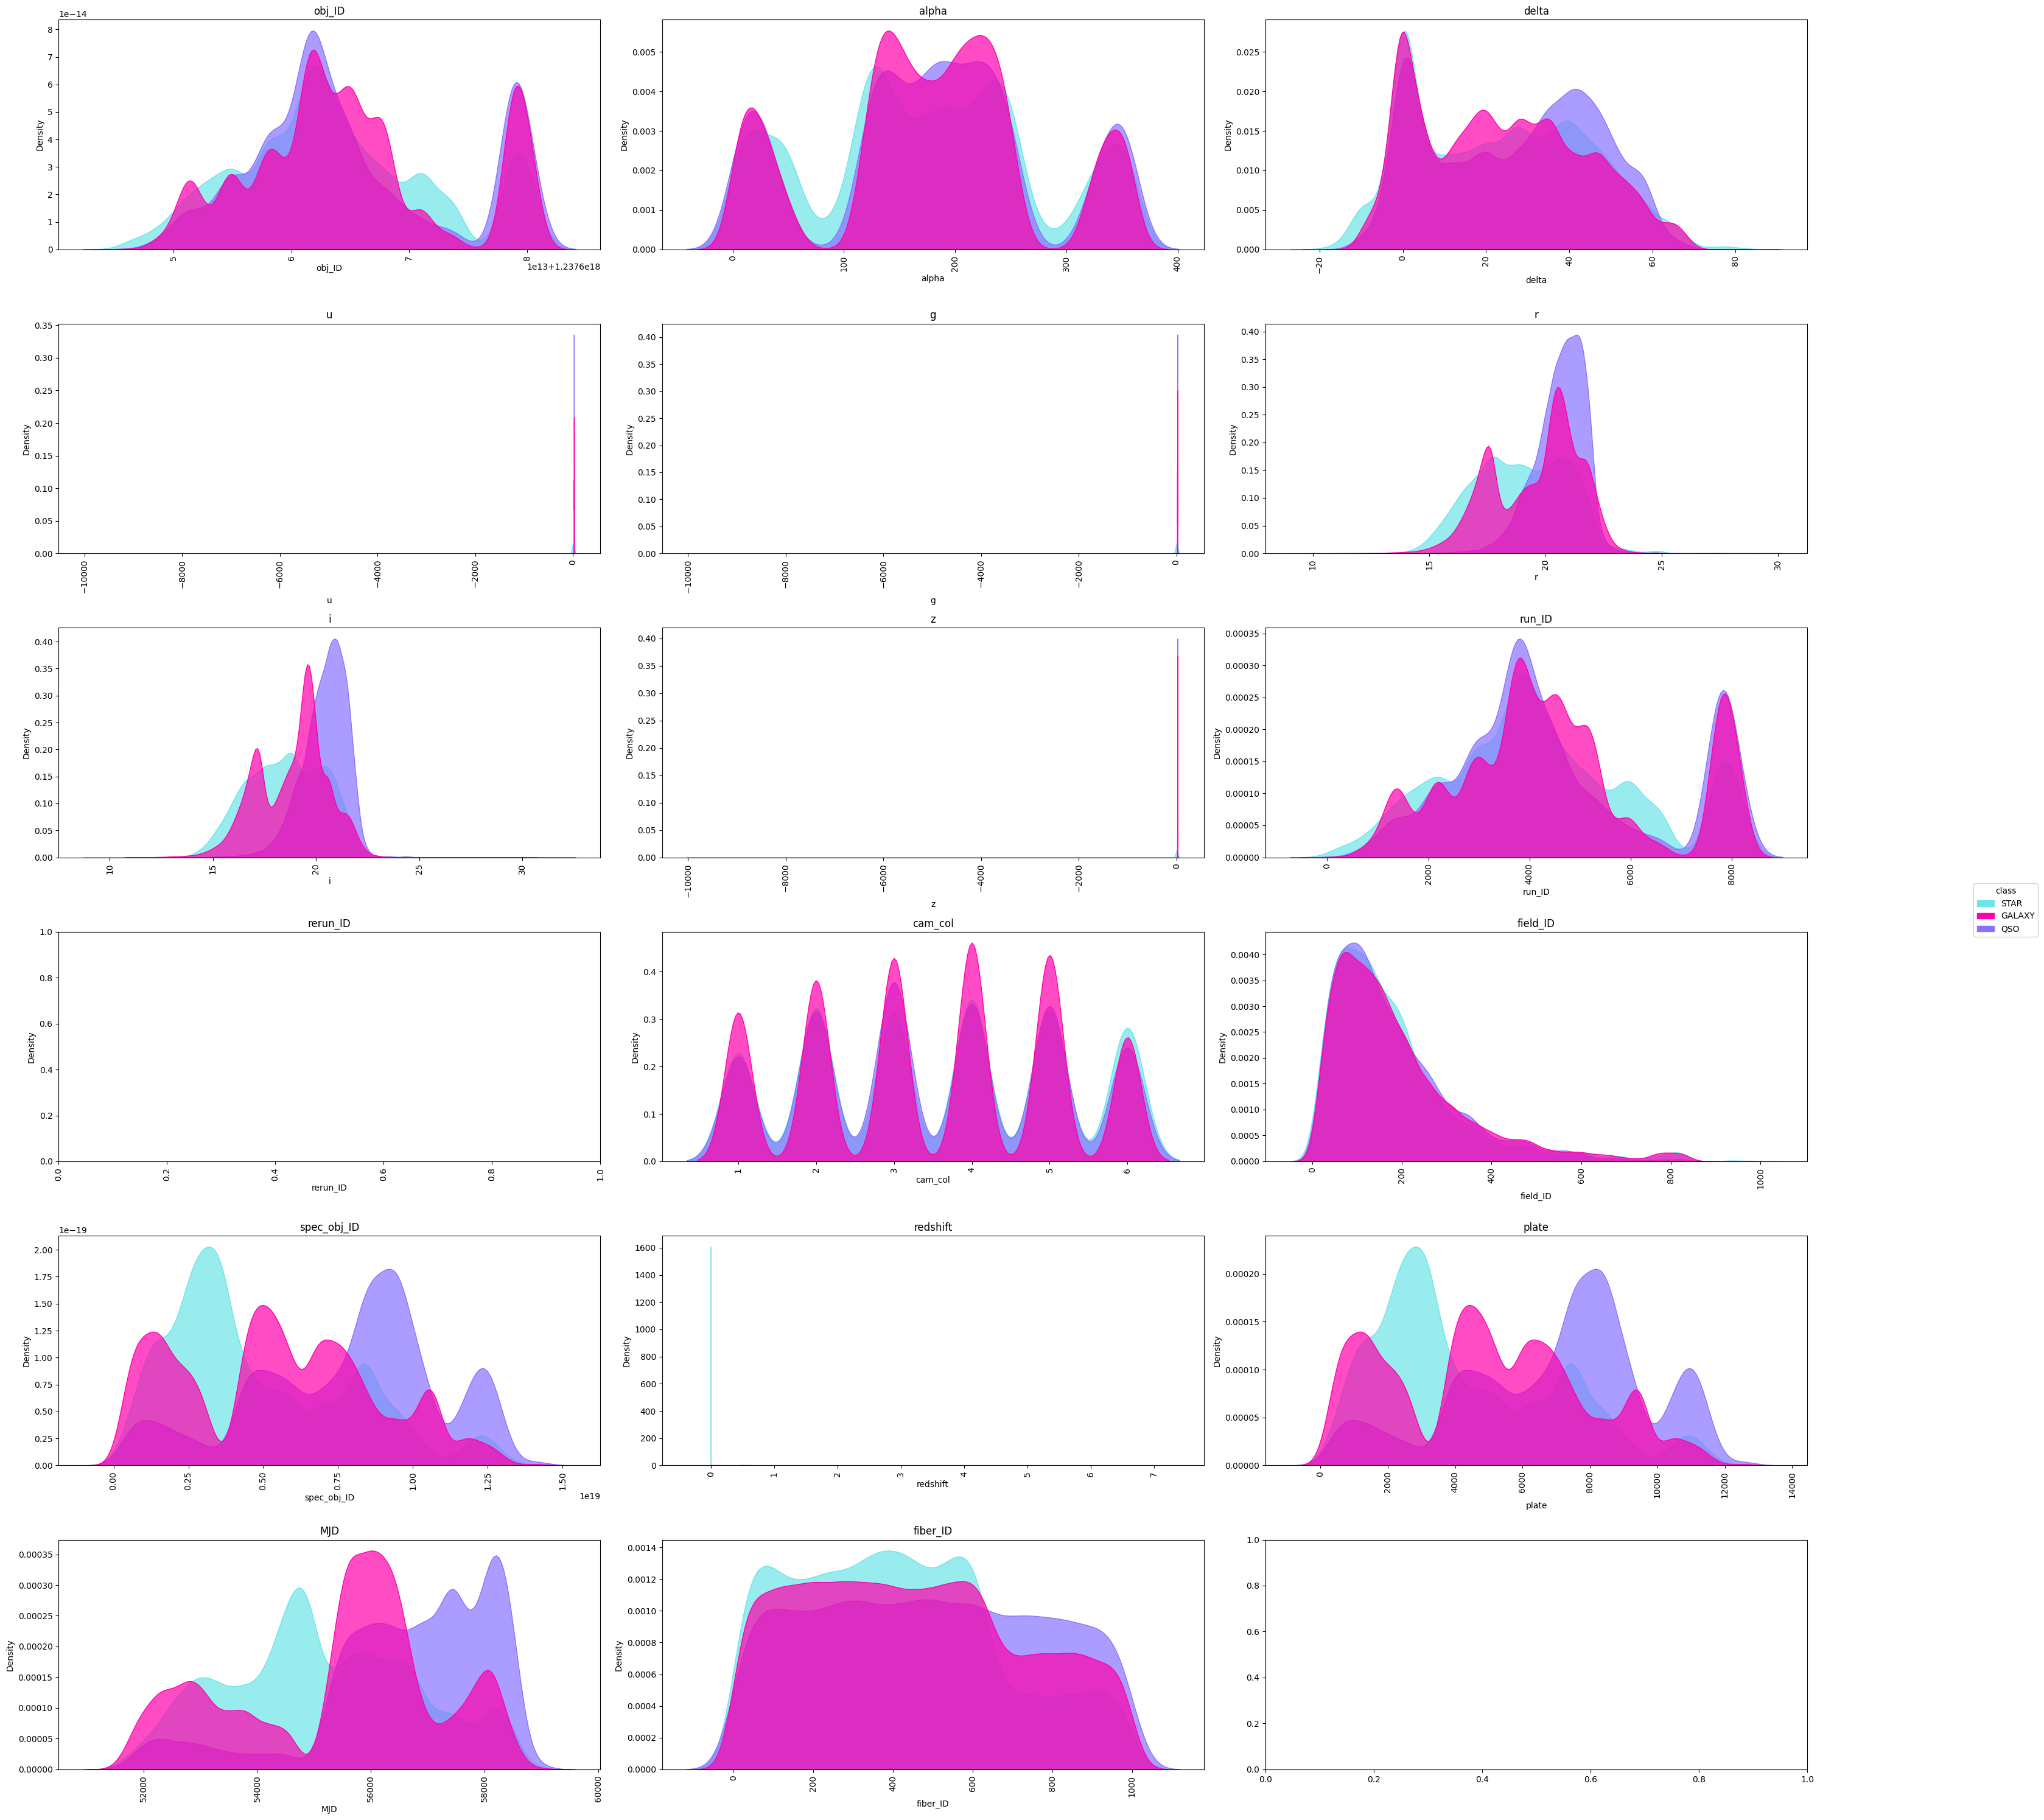

In [5]:
# Filtrar variables numéricas
numeric_vars = datos.select_dtypes(include='number').columns.tolist()

# Crear grid 6x3
fig, axes = plt.subplots(6, 3, figsize=(30, 30))
axes = axes.flatten()

# Paleta de colores
palette = {'STAR': '#6ce5e8', 'GALAXY': '#ff00ab', 'QSO': '#8873ff'}

# Gráficos
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=datos, x=var, hue='class', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)
    ax.get_legend().remove()

# Leyenda
legend_patches = [Patch(color=color, label=label) for label, color in palette.items()]
fig.legend(handles=legend_patches, title='class', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.show()

Con las graficas anteriores que nos muestran la densidad de observaciones segun la magnitud de las variables respecto a la clase que pertenecen notamos que nuestras variables siguen distribuciones muy distintas entre ellas.

Hay ciertas variables que a simple vista parece que nos puede ayudar a determinar a que clase pertenece cada una de las observaciones. R, I y Spec_obj son algunas de ellas.

Procederemos a utilizar tecnicas de seleccion de variables como PCA y VIF para determinar con certeza cuales son las variables que nos ayudan a explicar de manera precisa la varianza de nuestros datos y crear modelos precisos.

Planteamiento del modelado

1. Modelo RegLog Simple
2. Modelo RegLog + Feature Selection
3. Modelo RegLog + PCA
4. Modelo RegLog + Clustering
5. Modelo RegLog + Feature Selection + PCA + Clustering

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

- Modelo #1

In [7]:
RegLog = LogisticRegression()
RegLog.fit(x_train, y_train)

LogisticRegression()

In [8]:
y_pred = RegLog.predict(x_test)

In [9]:
RegLog.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.60025
Precision: 0.45835863709359753


c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score: 0.478439562483232
Recall: 0.60025


Text(0.5, 1.0, 'Modelo 1')

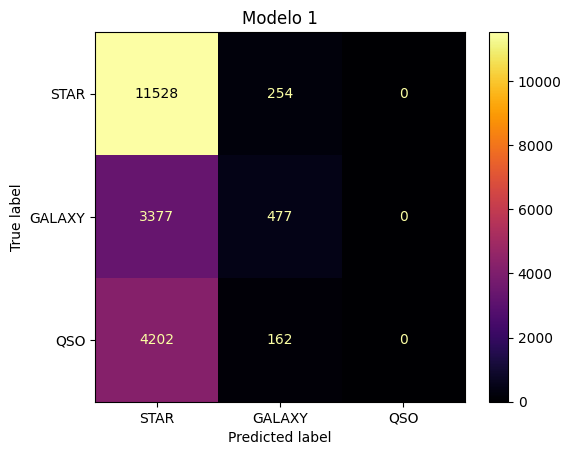

In [11]:
cmv1 = confusion_matrix(y_test, y_pred)
cmv1_display = ConfusionMatrixDisplay(cmv1, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv1_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 1')

PRIMER MODELO MEJORADO

In [12]:
# Separar variables (X) y la etiqueta/clase (y)
X = datos.drop(columns='class')  # Todas las columnas excepto 'class'
y = datos['class']               # Solo la columna de clase

In [13]:
# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit

# Ahora puedes entrenar tu modelo con X_train_scaled y y_train_resampled


In [14]:

RegLog_scaled = LogisticRegression(penalty='l2', solver='lbfgs')

In [15]:
RegLog_scaled.fit(X_train_scaled, y_train_resampled)


c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = RegLog_scaled.predict(X_test_scaled)
y_prob = RegLog_scaled.predict_proba(X_test_scaled)  # Probabilidad de la clase positiva

In [17]:
RegLog_scaled.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted'):.4f}")

Accuracy: 0.94876
Precision: 0.949647399282959
F1-Score: 0.9487408460446057
Recall: 0.94876
AUC-ROC: 0.9854


Text(0.5, 1.0, 'Modelo 2')

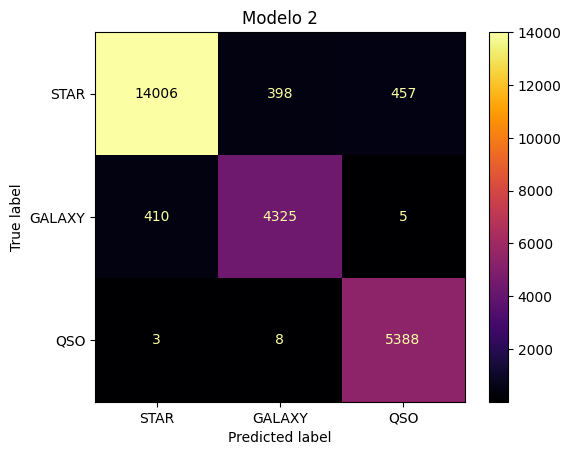

In [19]:
cmv2 = confusion_matrix(y_test, y_pred)
cmv2_display = ConfusionMatrixDisplay(cmv2, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv2_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 2')

SELECCION DE VARIABLES PARA EL MODELO

In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [21]:
#%% 2. Función para filtrado con VIF
def vif_filtering(dataframe, threshold=5):
    predictors = dataframe.drop(columns=['class'])
    features = list(predictors.columns)
    
    while True:
        # Calcular VIF para cada variable
        vif_data = pd.DataFrame()
        vif_data['variable'] = features
        vif_data['VIF'] = [variance_inflation_factor(predictors[features].values, i) 
                           for i in range(len(features))]
        
        # Si el máximo VIF es mayor al umbral, se elimina la variable correspondiente
        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            variable_to_drop = vif_data.loc[vif_data['VIF'].idxmax(), 'variable']
            features.remove(variable_to_drop)
        else:
            break
    return features

selected_vif = vif_filtering(datos, threshold=5)
print("\n[Filtro - VIF] Variables seleccionadas:", selected_vif)

c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



[Filtro - VIF] Variables seleccionadas: ['alpha', 'delta', 'z', 'run_ID', 'cam_col', 'field_ID', 'redshift', 'fiber_ID']


In [22]:
X_selected=datos[['alpha', 'delta', 'z', 'run_ID', 'cam_col', 'field_ID', 'redshift', 'fiber_ID']]

MODELO

In [23]:

# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit

# Ahora puedes entrenar tu modelo con X_train_scaled y y_train_resampled

In [24]:

RegLog_scaled = LogisticRegression(penalty='l2', solver='lbfgs')

In [25]:
RegLog_scaled.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [26]:
y_pred = RegLog_scaled.predict(X_test_scaled)
y_prob = RegLog_scaled.predict_proba(X_test_scaled)  # Probabilidad de la clase positiva

In [27]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted'):.4f}")

Accuracy: 0.9236
Precision: 0.9243469251243109
F1-Score: 0.9233854720172237
Recall: 0.9236
AUC-ROC: 0.9728


Text(0.5, 1.0, 'Modelo 3')

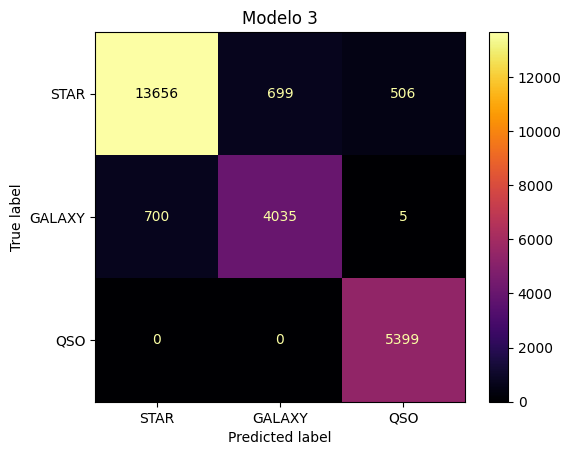

In [28]:
cmv3 = confusion_matrix(y_test, y_pred)
cmv3_display = ConfusionMatrixDisplay(cmv3, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv3_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 3')

PCA

In [29]:
X = datos.drop(columns=['class'], axis=1)
Y = datos['class']

In [30]:

# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit



In [31]:
pca=PCA()
X_train_transformada = pca.fit_transform(X_train_scaled)
X_test_transformada = pca.transform(X_test_scaled)
print(X_train_scaled.shape)
print(X_train_transformada.shape)

(133752, 17)
(133752, 17)


In [32]:
X_train_transformed = pd.DataFrame(X_train_transformada, columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9','CP10','CP11','CP12','CP13','CP14','CP15','CP16', 'CP17'])
X_test_transformed = pd.DataFrame(X_test_transformada, columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9','CP10','CP11','CP12','CP13','CP14','CP15','CP16', 'CP17'])
X_train_transformed

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,CP13,CP14,CP15,CP16,CP17
0,2.454402,-0.298795,0.958595,1.579745,1.594830,0.086358,-1.379084,-0.450338,-0.445318,0.698460,0.154830,-0.263859,0.009184,-0.003332,-0.000030,-1.292145e-05,5.369611e-17
1,2.725301,-0.087306,1.830847,-0.880082,0.502988,-0.642512,-1.022144,-0.372522,-0.034188,-0.684379,-0.003050,0.086726,-0.023018,0.000425,-0.000044,-5.591701e-06,-5.608849e-17
2,-2.590346,0.266943,-1.801364,-1.181020,-0.375382,-0.412890,-0.242018,-0.156944,-0.272334,-1.088037,0.278678,-0.027650,-0.025615,0.009269,-0.000056,-5.627917e-07,1.139456e-17
3,-0.466800,-0.023644,0.218055,0.708118,-1.606126,-0.278606,-1.021615,-1.601059,0.136496,0.477567,-0.131165,-0.066973,-0.021319,-0.011303,-0.000027,-3.032909e-06,-3.012468e-19
4,2.390295,-0.249236,-1.421386,-0.575487,-0.812575,1.676829,-0.546620,0.139547,-1.471078,0.161364,0.232182,0.081276,-0.002877,0.003716,-0.000042,-9.159379e-06,5.774315e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133747,0.775904,0.072996,0.495542,1.152207,1.650428,-2.073687,0.202334,-0.485849,-1.475989,-1.202776,-0.018357,0.122628,-0.014174,0.002587,0.000062,1.057859e-04,-3.717614e-19
133748,2.386117,-0.226316,0.475149,-0.302710,0.408169,0.349827,0.379901,0.577611,-0.056061,0.415320,-0.093797,-0.253903,0.017578,-0.001949,0.000154,-1.746365e-05,-1.319903e-20
133749,-1.654235,0.066528,-1.161809,-0.436885,-0.066687,-0.823504,-1.235812,1.195007,-0.618360,1.111331,-0.047210,0.283446,-0.000352,0.010729,0.000362,1.121193e-04,2.691073e-19
133750,-1.039766,0.099687,1.995572,-2.317440,-0.134598,-0.014163,0.006642,1.227808,-0.119531,0.590831,0.179418,0.102687,0.020532,0.015041,-0.000043,-4.119567e-06,1.206424e-19


In [33]:
#%% Validate the "recommended" PCA's
w,v = np.linalg.eig(pca.get_covariance()) # Get vectors for covariance matrix
w=np.abs(w)
indx = np.argsort(w)[::-1] # sort
porcentaje = w[indx]/np.sum(w) # convert to %
porcent_acum = np.cumsum(porcentaje) # Accumulate
porcent_acum

array([0.28730427, 0.4738107 , 0.60342111, 0.6821211 , 0.74961876,
       0.80951536, 0.86288861, 0.91321614, 0.95708069, 0.99529357,
       0.99766189, 0.9999443 , 0.99998978, 1.        , 1.        ,
       1.        , 1.        ])

In [34]:
X_train = X_train_transformed[['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8']]
X_test = X_test_transformed[['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8']]

In [35]:
RegLog_pca = LogisticRegression(penalty='l2', solver='lbfgs')

In [36]:
RegLog_pca.fit(X_train, y_train_resampled)

LogisticRegression()

In [37]:
y_pred = RegLog_pca.predict(X_test)
y_prob = RegLog_pca.predict_proba(X_test)  # Probabilidad de la clase positiva

In [38]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted'):.4f}")

Accuracy: 0.58304
Precision: 0.6343411598052894
F1-Score: 0.5911472437384221
Recall: 0.58304
AUC-ROC: 0.7553


Text(0.5, 1.0, 'Modelo 4')

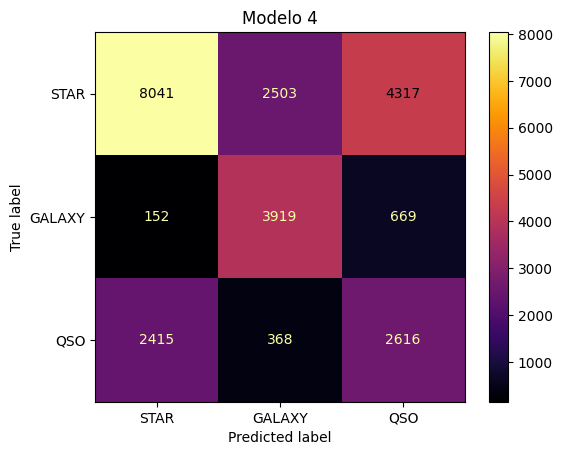

In [39]:
cmv4 = confusion_matrix(y_test, y_pred)
cmv4_display = ConfusionMatrixDisplay(cmv4, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv4_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 4')

CLUSTERING

In [40]:

plt.rcParams['figure.figsize'] = (13, 13)
plt.style.use('ggplot')

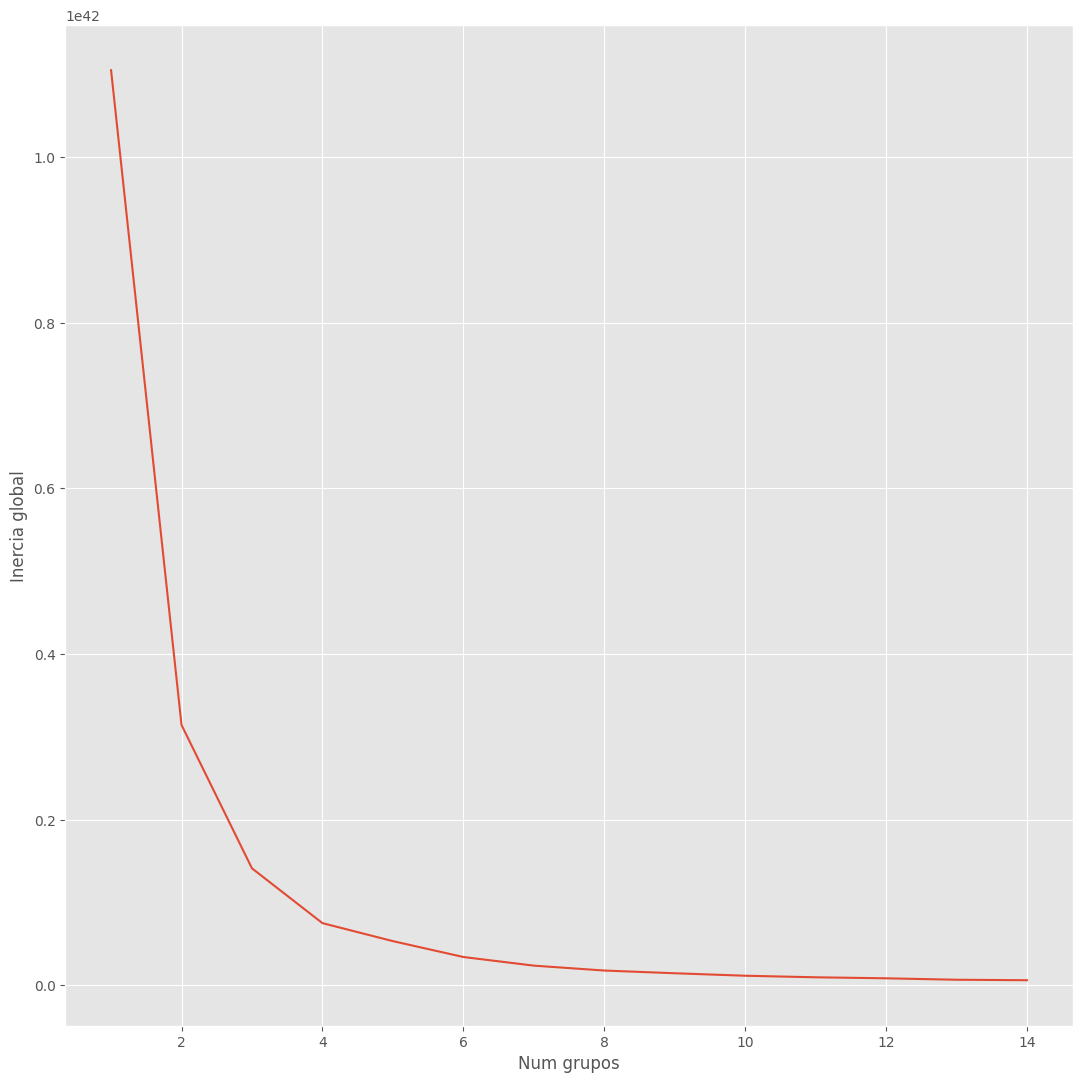

In [41]:
#%% Obtener el número ideal de clústers
# Método de codo
# Existen otros como:Criterio de Calinski, Affinity propagation (AP)
# Gap, dendogramas

inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters=k,init='random',n_init='auto')
    model = model.fit(X)
    inercias[k] = model.inertia_
    
plt.plot(np.arange(1,15),inercias[1:])
plt.xlabel('Num grupos')
plt.ylabel('Inercia global')
plt.show()

In [42]:
df=datos.copy()

[[1.23766542e+18 1.91564982e+02 2.31609199e+01 2.31774372e+01
  2.13937904e+01 2.01453893e+01 1.94541038e+01 1.90999473e+01
  4.64323952e+03 3.01000000e+02 3.50100957e+00 1.79026144e+02
  5.80868145e+18 6.48256725e-01 5.15902179e+03 5.58962117e+04
  5.06407028e+02]
 [1.23766652e+18 1.65504764e+02 2.68685673e+01 2.26710300e+01
  2.18133116e+01 2.10049526e+01 2.04430251e+01 2.01084889e+01
  4.90034341e+03 3.01000000e+02 3.52911764e+00 1.75322811e+02
  9.83616108e+18 9.22004944e-01 8.73614177e+03 5.75815751e+04
  5.08384613e+02]
 [1.23766220e+18 1.72365646e+02 2.27282567e+01 1.98979173e+01
  1.82925051e+01 1.77682866e+01 1.73643652e+01 1.67975266e+01
  3.89321738e+03 3.01000000e+02 3.50781397e+00 2.04807036e+02
  1.93934496e+18 1.65869073e-01 1.72240485e+03 5.33444124e+04
  3.25375384e+02]]


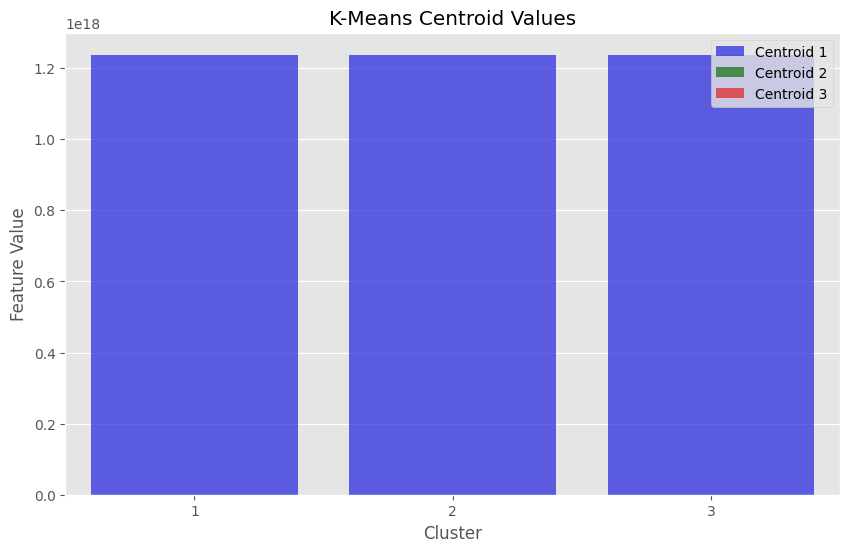

In [43]:
#%% Algoritmo de cluster
kmeans = KMeans(n_clusters=3,init='k-means++',n_init='auto', random_state=42).fit(X)
#init='random'
#init='ndarray'
# Obtener los centroides
df['cluster'] = kmeans.fit_predict(X)
C = kmeans.cluster_centers_
print(C)


# Configura el estilo de Seaborn
#sns.set(style="whitegrid")
# Crea un gráfico de barras para los centroides
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 0], color='blue', alpha=0.7, label='Centroid 1')
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 1], color='green', alpha=0.7, label='Centroid 2')
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 2], color='red', alpha=0.7, label='Centroid 3')
plt.title('K-Means Centroid Values')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

In [44]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,cluster
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,1
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,1
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,2
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,0


In [45]:
df = pd.get_dummies(df, columns=['cluster'], prefix='cluster', drop_first=True, dtype=float)


In [46]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,cluster_1,cluster_2
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0.0,0.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1.0,0.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0.0,0.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1.0,0.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,1.0,0.0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,1.0,0.0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,0.0,1.0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,0.0,0.0


In [47]:
X = df.drop(columns=['class'], axis=1)
Y = df['class']

In [48]:

# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit


In [49]:
RegLog_cluster = LogisticRegression(penalty='l2', solver='lbfgs')

In [50]:
RegLog_cluster.fit(X_train_scaled, y_train_resampled)

c:\Users\ivanm\anaconda3\anaconda\envs\ITESO_Analisis\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = RegLog_cluster.predict(X_test_scaled)
y_prob = RegLog_cluster.predict_proba(X_test_scaled)  # Probabilidad de la clase positiva

In [52]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.94904
Precision: 0.9497317699833246
F1-Score: 0.9489721421883465
Recall: 0.94904


Text(0.5, 1.0, 'Modelo 5')

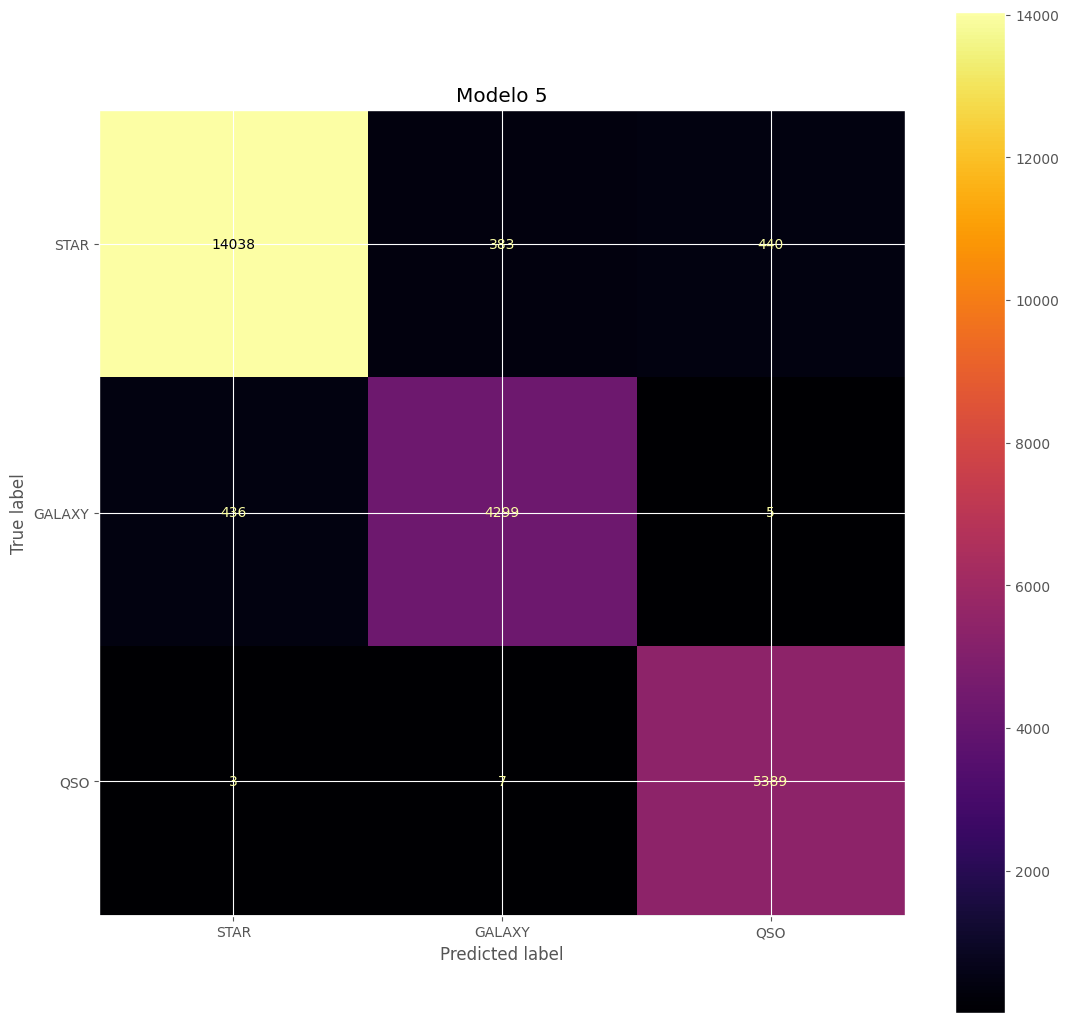

In [53]:
cmv5 = confusion_matrix(y_test, y_pred)
cmv5_display = ConfusionMatrixDisplay(cmv5, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv5_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 5')

MODELO COMPLETO

SELECCION DE VARIABLES

In [54]:
X_selected=datos[['alpha', 'delta', 'z', 'run_ID', 'cam_col', 'field_ID', 'redshift', 'fiber_ID']]

CLUSTERING

C:\Users\ivanm\AppData\Local\Temp\ipykernel_33764\3617160750.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['cluster'] = kmeans.fit_predict(X_selected)


[[1.77554317e+02 2.52202204e+01 1.86487831e+01 4.44108576e+03
  3.48633176e+00 1.87761253e+02 5.52720949e-01 4.37870387e+02]
 [1.77984396e+02 2.98642615e+01 1.82358279e+01 2.27609135e+03
  3.58132229e+00 1.81713409e+02 5.42023749e-01 4.37290126e+02]
 [1.77325178e+02 1.32511009e+01 1.93295851e+01 7.68564772e+03
  3.47965685e+00 1.88079266e+02 6.87855423e-01 4.96089901e+02]]


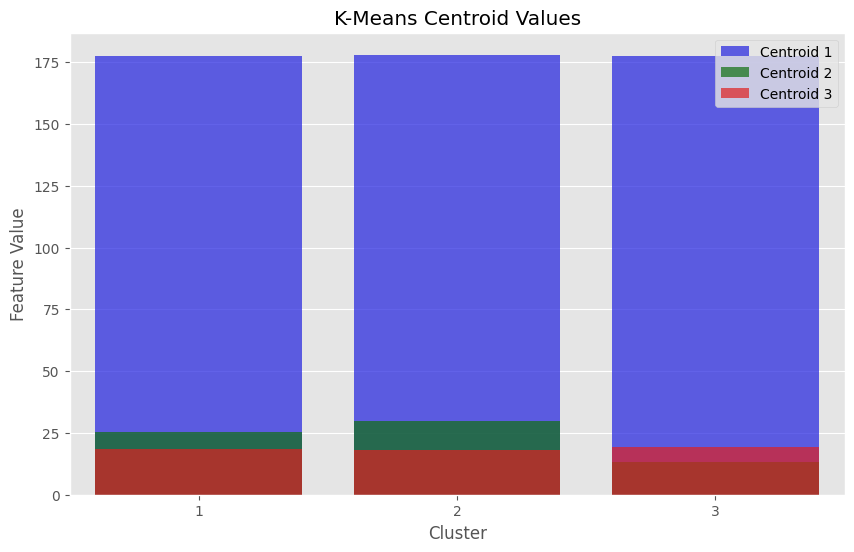

In [55]:
#%% Algoritmo de cluster
kmeans = KMeans(n_clusters=3,init='k-means++',n_init='auto', random_state=42).fit(X)
#init='random'
#init='ndarray'
# Obtener los centroides
X_selected['cluster'] = kmeans.fit_predict(X_selected)
C = kmeans.cluster_centers_
print(C)


# Configura el estilo de Seaborn
#sns.set(style="whitegrid")
# Crea un gráfico de barras para los centroides
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 0], color='blue', alpha=0.7, label='Centroid 1')
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 1], color='green', alpha=0.7, label='Centroid 2')
sns.barplot(x=np.arange(1, len(C) + 1), y=C[:, 2], color='red', alpha=0.7, label='Centroid 3')
plt.title('K-Means Centroid Values')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

In [56]:
df_final = pd.get_dummies(X_selected, columns=['cluster'], prefix='cluster', drop_first=True, dtype=float)

In [57]:
df_final

,alpha,delta,z,run_ID,cam_col,field_ID,redshift,fiber_ID,cluster_1,cluster_2
0,135.689107,32.494632,18.79371,3606,2,79,0.634794,171,0.0,0.0
1,144.826101,31.274185,21.61427,4518,5,119,0.779136,427,0.0,0.0
2,142.188790,35.582444,18.94827,3606,2,120,0.644195,299,0.0,0.0
3,338.741038,-0.402828,19.25010,4192,3,214,0.932346,775,0.0,0.0
4,345.282593,21.183866,15.54461,8102,3,137,0.116123,842,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,20.73569,7778,2,581,0.000000,438,0.0,1.0
99996,29.493819,19.798874,19.41526,7917,1,289,0.404895,866,0.0,1.0
99997,224.587407,15.700707,17.35221,5314,4,308,0.143366,74,0.0,0.0
99998,212.268621,46.660365,18.62482,3650,4,131,0.455040,470,0.0,0.0


PCA

In [58]:
# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(df_final, Y, stratify=Y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit


In [59]:
pca=PCA()
X_train_transformada = pca.fit_transform(X_train_scaled)
X_test_transformada = pca.transform(X_test_scaled)
print(X_train_scaled.shape)
print(X_train_transformada.shape)

(133752, 10)
(133752, 10)


In [60]:
X_train_transformed = pd.DataFrame(X_train_transformada, columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9','CP10'])
X_test_transformed = pd.DataFrame(X_test_transformada, columns = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8','CP9','CP10'])
X_train_transformed

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10
0,-0.259060,2.408798,1.113185,-0.462728,-0.199911,1.185399,-0.226773,-0.010312,0.829595,0.085878
1,-0.589372,0.824388,1.201273,0.314816,-0.469372,0.964108,-0.167663,0.073801,0.824512,-0.594427
2,1.633536,-1.601032,-0.414614,-0.114677,0.200070,0.388815,0.004066,0.897695,-0.477826,-0.408050
3,-0.262573,0.044109,-1.516786,0.732549,-0.435812,1.394159,-1.153386,-0.423774,0.862205,-0.177420
4,1.880997,-0.506667,0.429508,1.302485,-0.905367,-0.290792,0.113999,1.885363,-0.048759,0.153473
...,...,...,...,...,...,...,...,...,...,...
133747,1.345286,3.229948,0.666135,-1.029980,0.311146,-0.085100,-0.574942,1.267605,-0.311960,0.230102
133748,0.263179,0.477370,1.380474,0.249074,-0.388539,-0.407867,0.575747,-0.383573,0.581848,0.160741
133749,0.547031,0.626011,1.750557,-0.306114,-0.253194,0.588129,0.025433,-0.857069,0.389106,0.315574
133750,-2.332319,-1.102405,1.514914,0.692078,-0.424604,-0.932261,0.113310,-0.000694,-1.048011,-0.132084


In [61]:
#%% Validate the "recommended" PCA's
w,v = np.linalg.eig(pca.get_covariance()) # Get vectors for covariance matrix
w=np.abs(w)
indx = np.argsort(w)[::-1] # sort
porcentaje = w[indx]/np.sum(w) # convert to %
porcent_acum = np.cumsum(porcentaje) # Accumulate
porcent_acum

array([0.24013867, 0.37007555, 0.48452743, 0.58679888, 0.68513138,
       0.76993584, 0.84977986, 0.92710693, 0.99298141, 1.        ])

In [62]:
X_train = X_train_transformed[['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8']]
X_test = X_test_transformed[['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8']]

MODELO

In [63]:
RegLog_final = LogisticRegression(penalty='l2', solver='lbfgs')

In [64]:
RegLog_final.fit(X_train, y_train_resampled)

LogisticRegression()

In [65]:
y_pred = RegLog_final.predict(X_test)
y_prob = RegLog_final.predict_proba(X_test)  # Probabilidad de la clase positiva

In [66]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted'):.4f}")

Accuracy: 0.83368
Precision: 0.856212045937036
F1-Score: 0.8365529253410114
Recall: 0.83368
AUC-ROC: 0.9376


Text(0.5, 1.0, 'Modelo 6')

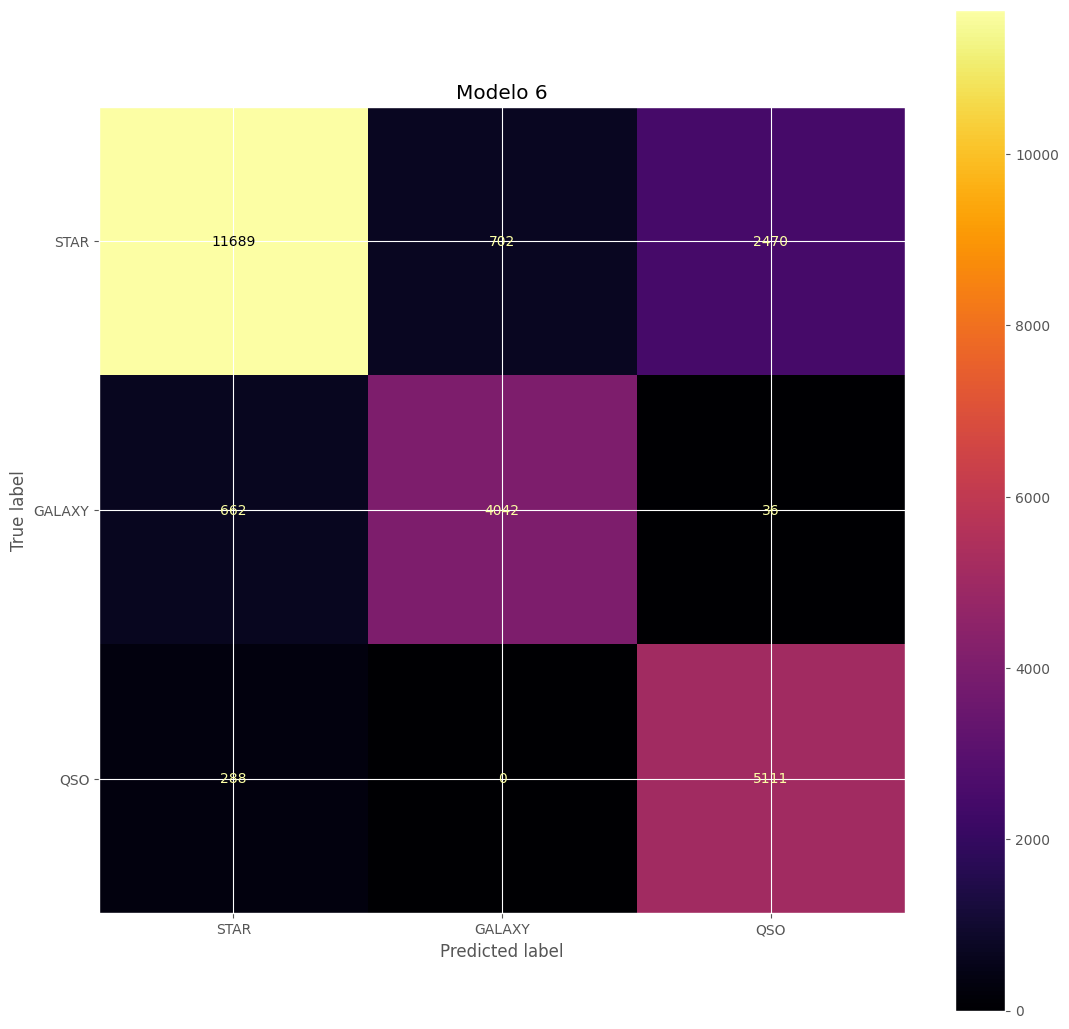

In [67]:
cmv6 = confusion_matrix(y_test, y_pred)
cmv6_display = ConfusionMatrixDisplay(cmv6, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv6_display.plot(cmap=plt.cm.inferno)
plt.title('Modelo 6')

- Conclusiones

Con la realizacion de este proyecto podemos darnos cuenta que existen muchas herramientas que nos pueden ayudar a trabajar y obtener mejores resultados segun la naturaleza de nuestros datos, es importante conocerlas y usarlas de forma adecuada para asi crear modelos robustos, funcionales y eficientes.
De igual forma como pudimos darnos cuenta el modelo con el cual implementamos todas las herramientas no fue el mejor, en ocasiones menos es mas.
Con el VIF tambien nos percatamos que podemos obtener resultados y rendimientos buenos sin la necesidad de utilizar el 100% de nuestras variables, reduciendo asi el costo computacional de nuestro modelo.
